In [1]:
!pip install opendatasets

In [2]:
import opendatasets as op

url = 'https://www.kaggle.com/datasets/arjuntejaswi/plant-village'

op.download(url)

100%|██████████| 329M/329M [00:04<00:00, 78.0MB/s]


In [3]:
!ls

kaggle.json  plant-village  PlantVillage  sample_data


In [4]:
import shutil

src = '/content/plant-village/PlantVillage/Potato___Early_blight'
des = '/content/PlantVillage'
shutil.move(src, des)
src = '/content/plant-village/PlantVillage/Potato___Late_blight'
des = '/content/PlantVillage'
shutil.move(src, des)
src = '/content/plant-village/PlantVillage/Potato___healthy'
des = '/content/PlantVillage'
shutil.move(src, des)
# shutil.rmtree('/content/PlantVillage')
# shutil.rmtree('/content/plant-village')

'/content/PlantVillage/Potato___healthy'

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory('/content/PlantVillage',
                                                              shuffle=True,
                                                              image_size=(256, 256),
                                                              batch_size=32)

Found 2152 files belonging to 3 classes.


In [7]:
dataset.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [8]:
class_name = dataset.class_names
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [9]:
len(dataset)

68

Potato___Early_blight


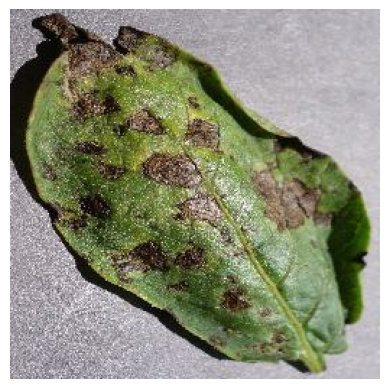

In [10]:
# plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
  # for i in range(12):
    # ax = plt.subplot(3, 4, i+1)
    # print(image_batch[0].shape)
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    print(class_name[label_batch[0]])
    # print(label_batch[i].numpy())
    plt.axis('off')

In [11]:
# Define the sizes for the splits
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = int(0.1 * len(dataset))

# Use the 'take' and 'skip' methods to split the dataset
train_dataset = dataset.take(train_size)
remaining_dataset = dataset.skip(train_size)
val_dataset = remaining_dataset.take(val_size)
test_dataset = remaining_dataset.skip(val_size)


In [12]:
print(len(train_dataset))
print(len(test_dataset))
print(len(val_dataset))

54
8
6


In [13]:
train_ds = train_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [14]:
print(f"Training set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")
print(f"Test set size: {len(test_dataset)}")

Training set size: 54
Validation set size: 6
Test set size: 8


In [15]:
resize_rescale = tf.keras.Sequential([layers.experimental.preprocessing.Resizing(256, 256),
                                      layers.experimental.preprocessing.Rescaling(1./255)
                                      ])

In [16]:
data_augmentation = tf.keras.Sequential([layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
                                         layers.experimental.preprocessing.Rescaling(0.2),
                                         ])

**Building CNN**

In [17]:
model = tf.keras.Sequential([
    resize_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])

model.build(input_shape=(32, 256, 256, 3))

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
history = model.fit(train_ds, epochs=50, validation_data=val_ds, batch_size=32, verbose=1)

Epoch 1/50
54/54 [==============================] - 21s 96ms/step - loss: 0.9273 - accuracy: 0.4832 - val_loss: 0.8517 - val_accuracy: 0.4635
Epoch 2/50
54/54 [==============================] - 3s 61ms/step - loss: 0.8344 - accuracy: 0.5503 - val_loss: 0.5226 - val_accuracy: 0.8125
Epoch 3/50
54/54 [==============================] - 3s 61ms/step - loss: 0.4639 - accuracy: 0.8258 - val_loss: 0.3919 - val_accuracy: 0.8490
Epoch 4/50
54/54 [==============================] - 3s 60ms/step - loss: 0.3894 - accuracy: 0.8403 - val_loss: 0.3806 - val_accuracy: 0.8438
Epoch 5/50
54/54 [==============================] - 3s 60ms/step - loss: 0.3323 - accuracy: 0.8791 - val_loss: 0.3974 - val_accuracy: 0.8646
Epoch 6/50
54/54 [==============================] - 3s 61ms/step - loss: 0.3069 - accuracy: 0.8802 - val_loss: 0.3968 - val_accuracy: 0.8490
Epoch 7/50
54/54 [==============================] - 3s 59ms/step - loss: 0.2592 - accuracy: 0.8993 - val_loss: 0.2738 - val_accuracy: 0.9167
Epoch 8/50
5

In [21]:
loss, accuracy = model.evaluate(test_ds)

8/8 [==============================] - 3s 63ms/step - loss: 0.1153 - accuracy: 0.9784


In [22]:
print(loss)
print(accuracy)

0.11525017023086548
0.9784482717514038


In [23]:
para = history.params
print(para)

{'verbose': 1, 'epochs': 50, 'steps': 54}


In [24]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [25]:
history.history['accuracy']

[0.48321759700775146,
 0.5503472089767456,
 0.8258101940155029,
 0.8402777910232544,
 0.8790509104728699,
 0.8802083134651184,
 0.8993055820465088,
 0.8964120149612427,
 0.8883101940155029,
 0.9097222089767456,
 0.9369212985038757,
 0.9380787014961243,
 0.9334490895271301,
 0.9421296119689941,
 0.9276620149612427,
 0.9548611044883728,
 0.9594907164573669,
 0.9456018805503845,
 0.9704861044883728,
 0.9618055820465088,
 0.9762731194496155,
 0.9537037014961243,
 0.9756944179534912,
 0.984375,
 0.9878472089767456,
 0.9814814925193787,
 0.9820601940155029,
 0.9739583134651184,
 0.9866898059844971,
 0.9832175970077515,
 0.9918981194496155,
 0.9762731194496155,
 0.9913194179534912,
 0.9895833134651184,
 0.9884259104728699,
 0.9959490895271301,
 0.9971064925193787,
 0.9942129850387573,
 0.9866898059844971,
 0.9936342835426331,
 0.9913194179534912,
 0.9832175970077515,
 0.9907407164573669,
 0.9965277910232544,
 0.9965277910232544,
 0.9918981194496155,
 0.9965277910232544,
 0.9878472089767456,
 

**Plot Loss and Accuracy**

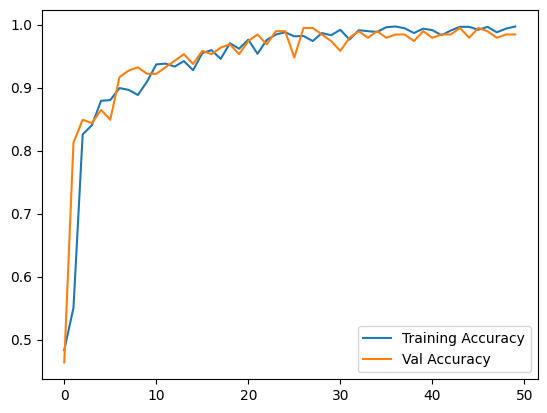

In [26]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()

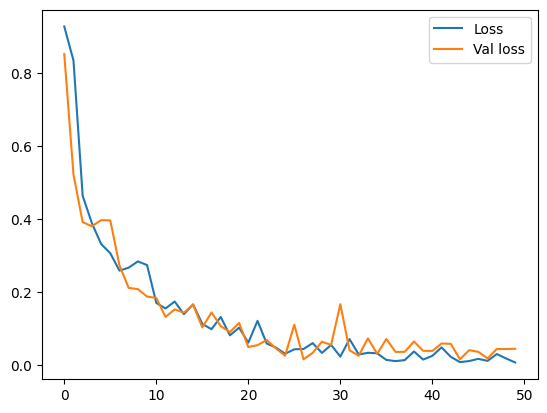

In [27]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.legend()
plt.show()

**Make prediction on single leaf**

Potato___Late_blight
1/1 [==============================] - 0s 153ms/step
[7.2976594e-09 9.9999988e-01 1.4062000e-07]
Potato___healthy


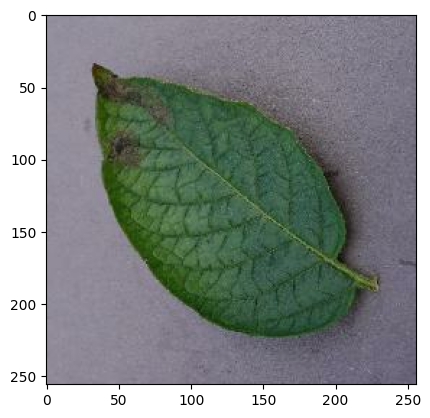

In [28]:
for image_batch, label_batch in test_ds.take(1):
  image = image_batch[0].numpy().astype('uint8')
  label = label_batch[0].numpy()

  # Display image
  print(class_name[label])
  plt.imshow(image)

  # Make Prediction
  prediction = model.predict(image_batch)
  print(prediction[0])
  print(class_name[label_batch[np.argmax(prediction[0])]])

In [29]:
model.save('potato_disease.h5')